# Economics Problem 2
### Shekhar Kumar

### Question 2.1

### The state variable are:-

1. The capital stock -$ k_{t} $ 
2. The productivity shocks to income function $ y_{t} $ given by $ z_{t} $
3. Income is completely determined by $ k_{t} $ and  $ z_{t} $. Control Variable choice may be dependent on formulation of the problem.

### Question 2.2

### The control variable are:-

1. The consumption  -  $ c_{t} $  and investment $ i_{t} $

### Question 2.3

### The Bellman equation is given by 

$$ V(k_{t},z_{t}) = \max_{c_t}  [u(c_{t})] + \beta E[V(k_{t+1},z_{t+1})]  $$

where

$$ c_{t} = (1-\delta)k_{t} + z_{t}k_{t}^\alpha - k_{t+1} $$

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt
import numba

# to print plots inline
%matplotlib inline

In [2]:
beta = 0.96
gamma = 0.50
delta =  0.05
alpha = 0.4
mean_shock = 0.0
sigma_shock = 0.20

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital(k) grid
ub_k      = scalar, upper bound of capital(k) grid 
size_k    = integer, number of grid points in kapital state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = .1
ub_k = 20.0 
size_k = 500  # Number of grid points for capital grid
size_eps = 100 # Number of grid points for shock grid
k_grid = np.linspace(lb_k, ub_k, size_k)
shock_grid =  np.exp(mean_shock + sigma_shock* np.random.randn(size_eps))

In [3]:
def utility(C,gamma):
    U = (C ** (1 - gamma)) / (1 - gamma)
    return U  

In [4]:
''' Create a three dimesional utility array with dimensions for k,k' and z.
Once the utility has been calculated at each of the value in this array. 
Take a mean value in the z dimension to get a 2-D array for Expected utility
'''
C =  np.zeros((size_k, size_k, size_eps))

@numba.jit
def C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha):
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for s in range(size_eps): #loop over z shock
                C[i,j,s] =   (1-delta)*k_grid[i] + shock_grid[s]*k_grid[i]**alpha-k_grid[j]

    return C

C =  C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha)
C[C<0] = 1e-6
U = utility(C,gamma) 
U[C == 1e-6] = -1e6

EU = np.mean(U, axis =2)

## Step 2: Value Function Iteration

In [7]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of k and k'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of k' for all k 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 2000 
V = np.zeros(size_k) # initial guess at value function
Vmat = np.zeros((size_k, size_k)) # initialize Vmat matrix
Vstore = np.zeros((size_k, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    @numba.jit
    def VFI_loop(size_k,Vmat,EU,beta,V):
        for i in range(size_k): # loop over k
            for j in range(size_k): # loop over k'
                Vmat[i, j] = EU[i, j] + beta * V[j] 
        return Vmat

    Vmat =  VFI_loop(size_k,Vmat,EU,beta,V)
    Vstore[:, VFiter] = V.reshape(size_k,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("Iteration ", VFiter, "dist =", VFdist)
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Iteration  1 dist = 9.459568511399885
Iteration  2 dist = 4.262650902696484
Iteration  3 dist = 3.4354507271356454
Iteration  4 dist = 3.005818393925427
Iteration  5 dist = 2.7240087664858414
Iteration  6 dist = 2.5152185273949677
Iteration  7 dist = 2.3485423613935765
Iteration  8 dist = 2.208689119642994
Iteration  9 dist = 2.087360594179682
Iteration  10 dist = 1.9794013865318902
Iteration  11 dist = 1.8817594950203116
Iteration  12 dist = 1.7922459357006986
Iteration  13 dist = 1.7094118542626688
Iteration  14 dist = 1.6322021510661884
Iteration  15 dist = 1.5598443768032197
Iteration  16 dist = 1.491755581756756
Iteration  17 dist = 1.4274266911515312
Iteration  18 dist = 1.366462661810104
Iteration  19 dist = 1.308683087353245
Iteration  20 dist = 1.253686903167413
Iteration  21 dist = 1.2014087072189525
Iteration  22 dist = 1.1514446615292897
Iteration  23 dist = 1.1038980202413384
Iteration  24 dist = 1.0584694036689868
Iteration  25 dist = 1.0150334608343385
Iteration  26 dist

Iteration  199 dist = 0.0008279227067760075
Iteration  200 dist = 0.0007948057985061041
Iteration  201 dist = 0.0007630135665550597
Iteration  202 dist = 0.0007324930238894467
Iteration  203 dist = 0.0007031933029395532
Iteration  204 dist = 0.0006750655708174236
Iteration  205 dist = 0.0006480629479881372
Iteration  206 dist = 0.0006221404300674749
Iteration  207 dist = 0.0005972548128738708
Iteration  208 dist = 0.0005733646203651688
Iteration  209 dist = 0.0005504300355454461
Iteration  210 dist = 0.0005284128341287442
Iteration  211 dist = 0.0005072763207607522
Iteration  212 dist = 0.00048698526794055397
Iteration  213 dist = 0.00046750585723032145
Iteration  214 dist = 0.00044880562295190884
Iteration  215 dist = 0.000430853398029285
Iteration  216 dist = 0.00041361926211891387
Iteration  217 dist = 0.0003970744916443891
Iteration  218 dist = 0.00038119151197690826
Iteration  219 dist = 0.00036594385150579
Iteration  220 dist = 0.00035130609744271624
Iteration  221 dist = 0.00033

Iteration  384 dist = 4.346782844777408e-07
Iteration  385 dist = 4.17291161625144e-07
Iteration  386 dist = 4.005995180023092e-07
Iteration  387 dist = 3.845755429665587e-07
Iteration  388 dist = 3.69192520111028e-07
Iteration  389 dist = 3.544248272646655e-07
Iteration  390 dist = 3.4024783701624983e-07
Iteration  391 dist = 3.2663790250353486e-07
Iteration  392 dist = 3.135723858349593e-07
Iteration  393 dist = 3.010295017702447e-07
Iteration  394 dist = 2.889883319312503e-07
Iteration  395 dist = 2.774287963802635e-07
Iteration  396 dist = 2.663316394091453e-07
Iteration  397 dist = 2.556783869067658e-07
Iteration  398 dist = 2.4545124688302167e-07
Iteration  399 dist = 2.3563319473396405e-07
Iteration  400 dist = 2.2620787376581575e-07
Iteration  401 dist = 2.1715956677326176e-07
Iteration  402 dist = 2.0847318182859453e-07
Iteration  403 dist = 2.001342664925687e-07
Iteration  404 dist = 1.921288941275634e-07
Iteration  405 dist = 1.8444374916271045e-07
Iteration  406 dist = 1.77

## Step 3: Extract decision rules from solution

In [8]:
'''Optimal Choice of c and k'''
optk = k_grid[PF]
optc = (1-delta)*k_grid + np.mean(shock_grid)*k_grid**alpha-k_grid[PF]

## Visualize output

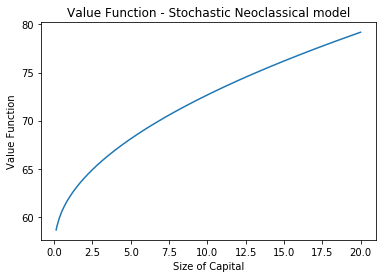

In [9]:
# Plot value function 
plt.figure()
plt.plot(k_grid[1:], VF[1:])
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - Stochastic Neoclassical model')
plt.show()

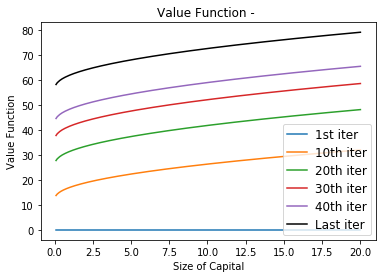

In [11]:
# Plot value function at several iterations
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid, Vstore[:,0], label='1st iter')
ax.plot(k_grid, Vstore[:,10], label='10th iter')
ax.plot(k_grid, Vstore[:,20], label='20th iter')
ax.plot(k_grid, Vstore[:,30], label='30th iter')
ax.plot(k_grid, Vstore[:,40], label='40th iter')
ax.plot(k_grid, Vstore[:,VFiter-1], 'k', label='Last iter')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - ')
plt.show()

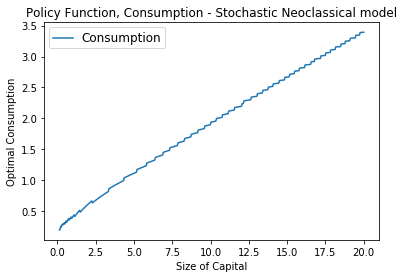

In [12]:
#Plot optimal consumption rule as a function of captal
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optc[1:], label='Consumption')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, Consumption - Stochastic Neoclassical model')
plt.show()

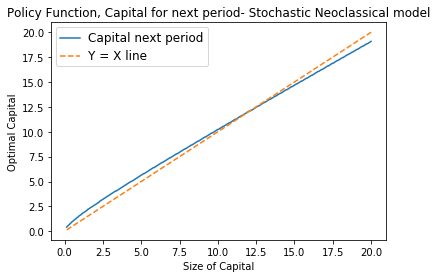

In [13]:
#Plot optimal capital next period rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optk[1:], label='Capital next period')
ax.plot(k_grid[1:], k_grid[1:], '--', label='Y = X line')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Capital')
plt.title('Policy Function, Capital for next period- Stochastic Neoclassical model')
plt.show()